# K-means Clustering

### Import resources and display image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/MyDrive/Udacity/Computer Vision Nanodegree/CVND_Exercises/1_3_Types_of_Features_Image_Segmentation'

/content/drive/MyDrive/Udacity/Computer Vision Nanodegree/CVND_Exercises/1_3_Types_of_Features_Image_Segmentation


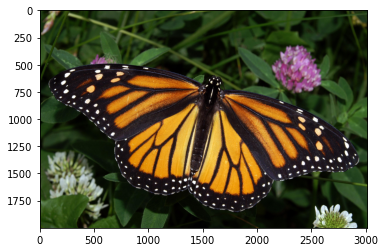

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
## TODO: Check out the images directory to see other images you can work with
# And select one!
image = cv2.imread('images/monarch.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

### Prepare data for k-means

In [35]:
# Reshape image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))

# Convert to float type
pixel_vals = np.float32(pixel_vals)

### Implement k-means clustering

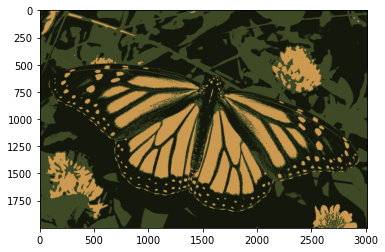

In [36]:
# define stopping criteria
# you can change the number of max iterations for faster convergence!
#(Note: The criteria tells this algorithm when to stop.
#Here, we make the criteria a value of epsilon or a max number of iterations.
#The max number of iterations are 10 and epsilon is a value we briefly
#talked about earlier where if the clusters move less than this after some iteration (0.2 pixels in this case),
#the algorithm stops, it's reached convergence.)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

## TODO: Select a value for k
# then perform k-means clustering
#(Note: Takes in our m by three array of pixel values (which we will created).
#Then a value for K (which I've initially set as two).
#Then any labels we want (none in this case).
#Then our stop criteria (which I'll have to define).
#Then a number of attempts and 
#finally how we choose our initial center points, which is randomly.)
k = 3
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
labels_reshape = labels.reshape(image.shape[0], image.shape[1])

plt.imshow(segmented_image)

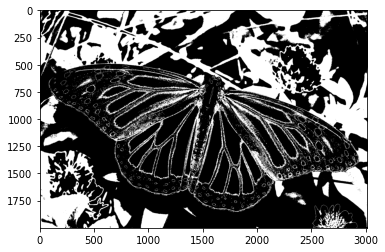

In [37]:
## TODO: Visualize one segment, try to find which is the leaves, background, etc!
#(Note: labels_reshape represents the number of clusters the kmeans cluster produced. i.e k value)
plt.imshow(labels_reshape==0, cmap='gray')

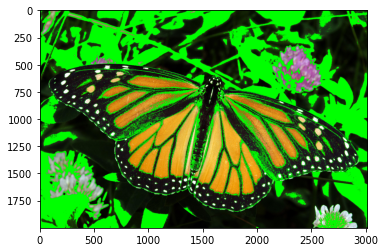

In [38]:
# mask an image segment by cluster

cluster = 0 # the first cluster

masked_image = np.copy(image)
# turn the mask green!
#(Note: labels_reshape represents the number of clusters the kmeans cluster produced. i.e k value)
masked_image[labels_reshape == cluster] = [0, 255, 0]

plt.imshow(masked_image)